# Python with MongoDB

## Libraries and Settings

In [1]:
# Libraries
import os
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(os.getcwd())

u:\Lektionen\DS_HS2024\python_mongodb


## Connect to the MongoDB

In [2]:
# Connect to the MongoDB service
client = MongoClient("mongodb://localhost:27017/")

## Select or create database and collection

In [27]:
# Select or create a database
db = client["car_database"]

# Select or create a collection (similar to a table in SQL)
collection = db["car_collection"]

## Create .json file with car data

In [28]:
# Read cara data from an Excel file into a DataFrame
file_path = 'car_data.xlsx'
df = pd.read_excel(file_path)

# Convert the DataFrame to a JSON object
data_json = df.to_json(orient='records', indent=4)

# Store the JSON data in a file
with open('car_data.json', 'w') as file:
    file.write(data_json)

print("Data has been read from the Excel file and stored in data.json")

Data has been read from the Excel file and stored in data.json


## Read and insert data

In [24]:
# Read data
with open('car_data.json', 'r') as file:
    example_data = json.load(file)

# Insert data into the collection
try:
    insert_result = collection.insert_many(example_data)
    # print(f"Inserted document IDs: {insert_result.inserted_ids}")
except Exception as e:
    print(f"Insert error: {e}")

## Query the collection

In [39]:
# Define a query with multiple conditions
query = {
    "Price": {"$lt": 120000},
    "PS": {"$gt": 100}
}

# Execute the query and fetch the results
results = list(collection.find(query))

# Convert the results into a Pandas DataFrame
df = pd.DataFrame(results)

df[['Offer_Id', 'Marke', 'Type', 'Fuel_Type', 'Price', 'PS']].head()

,Offer_Id,Marke,Type,Fuel_Type,Price,PS
0,7324420,AUDI,AUDI A5 Sportback 3.0 TDI quattro S-tronic (Li...,Diesel,22500,245
1,7512768,MERCEDES-BENZ,MERCEDES-BENZ SLK 200 7G-Tronic (Cabriolet),Benzin,23749,184
2,7512034,MERCEDES-BENZ,MERCEDES-BENZ C 350 Avantgarde 4Matic 7G-Troni...,Benzin,18500,306
3,7512728,MERCEDES-BENZ,MERCEDES-BENZ A 45 AMG 4Matic Speedshift 7G-DC...,Benzin,36000,360
4,7490242,AUDI,AUDI A5 Sportback 2.0 TFSI Sport quattro S-tro...,Benzin,48500,252


## Create histogram of car prices

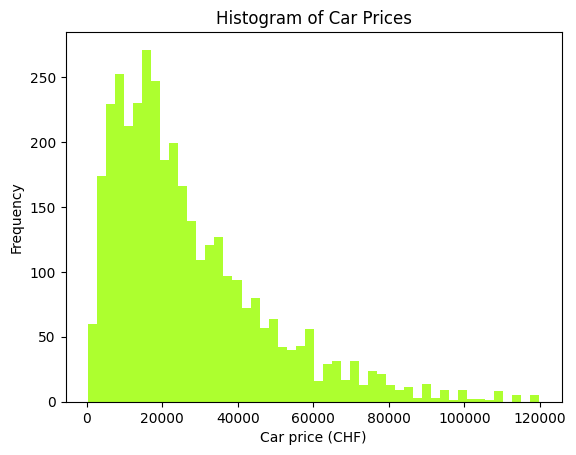

In [40]:
# Create a histogram of car prices
plt.hist(df['Price'], bins=50, color='greenyellow')
plt.title('Histogram of Car Prices')
plt.xlabel('Car price (CHF)')
plt.ylabel('Frequency')
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')